In [1]:
%matplotlib inline  
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt 
from collections import Counter
import math
from collections import Counter
import numpy as np
from scipy.special import comb
import itertools as it
# MANUEL: This doesn't work for me
#%load_ext line_profiler
from imp import reload
import itertools as it
import pandas as pd
import seaborn as sns
import sys
sys.path.insert(0, '../mallows kendall')
import mallows_kendall as mk
import cego_lop
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


# References
- http://www.spotseven.de/wp-content/papercite-data/pdf/zaef14c.pdf
- https://dl.acm.org/doi/pdf/10.1145/2576768.2598282  
- https://pubsonline.informs.org/doi/10.1287/ijoc.1120.0506
- https://link.springer.com/article/10.1007/s11721-015-0106-x
- http://iridia.ulb.ac.be/supp/IridiaSupp2015-004/index.html#Scenarios
- instances LOLIB: http://grafo.etsii.urjc.es/optsicom/lolib/#instances
- bayesian opt tutorial: https://arxiv.org/pdf/1012.2599.pdf
- VEGO package: https://cran.r-project.org/web/packages/CEGO/CEGO.pdf
- A Bayesian Discrete Optimization Algorithm for Permutation Based Combinatorial Problems 

  
  falta encontrar donde habia uno con el LOP
  
# LOP instance generator
  The instances $M$ follow this distribution $M_\phi[i,j]$
  $$M_\phi[i,j] = h(j-i+1,\phi) - h(j-i,\phi),$$ where $$h(k,\phi)=k/(1-\phi^k).$$
  
Taking different values of $\phi$ we controll the uniformity of $M$:
  
  

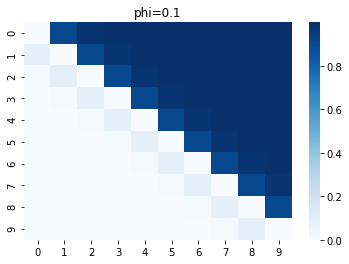

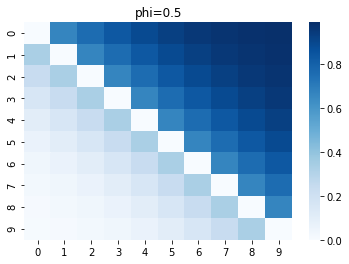

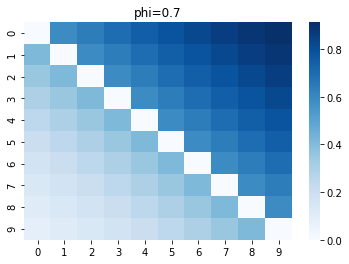

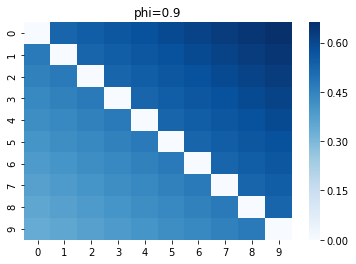

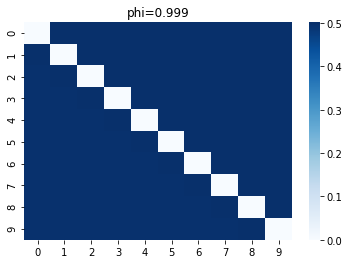

In [2]:
def h(k,phi):
  if (1-phi**k) == 0 : 
    return 0
  return k/(1-phi**k)
  #h(k,\phi)=k/(1-\phi^k)
def mij(i,j,phi):
  return h(j-i+1,phi) - h(j-i,phi)
      #h(j-i+1,\phi) - h(j-i,\phi)
n = 10
for phi in [0.1,0.5,0.7,0.9,0.999]:
  M = np.zeros((n,n))
  for i in range(n):
    for j in range(i+1,n):
      M[i,j] = mij(i,j,phi)
      M[j,i] = 1-M[i,j]
  g = sns.heatmap(M, cmap="Blues")
  g.set_title("phi="+str(phi))
  plt.show()

# running experiments
How to run one experiment with a particular parameter configuration

In [2]:
reload(cego_lop)
n = 10
m_max = 100
rep = 0 
#m_ini = 10
phi_instance = 0.9
budgetGA = 10

cego_lop.run_and_save(n,rep,phi_instance, budgetGA,m_max=m_max)

[1] "Evaluations: 11     Quality: 4150"
[1] "Evaluations: 12     Quality: 4150"
[1] "Evaluations: 13     Quality: 4150"
[1] "Evaluations: 14     Quality: 4150"
[1] "Evaluations: 15     Quality: 4110"
[1] "Evaluations: 16     Quality: 4110"
[1] "Evaluations: 17     Quality: 4110"
[1] "Evaluations: 18     Quality: 4008"
[1] "Evaluations: 19     Quality: 4008"
[1] "Evaluations: 20     Quality: 4008"
[1] "Evaluations: 21     Quality: 4008"
[1] "Evaluations: 22     Quality: 4008"
[1] "Evaluations: 23     Quality: 4008"
[1] "Evaluations: 24     Quality: 4008"
[1] "Evaluations: 25     Quality: 4008"
[1] "Evaluations: 26     Quality: 4008"
[1] "Evaluations: 27     Quality: 4008"
[1] "Evaluations: 28     Quality: 4008"
[1] "Evaluations: 29     Quality: 4008"
[1] "Evaluations: 30     Quality: 4008"
[1] "Evaluations: 31     Quality: 4008"
[1] "Evaluations: 32     Quality: 4008"
[1] "Evaluations: 33     Quality: 4008"
[1] "Evaluations: 34     Quality: 4008"
[1] "Evaluations: 35     Quality: 4008"


AttributeError: module 'mallows_kendall' has no attribute 'uborda'

In [ ]:
df = pd.read_pickle('pickles/pickLocal.pkl')#pick275670.pkl
color_variable = 'Solver'
y_variables = ['Fitness','Distance']
palette = sns.color_palette("husl", len(df[color_variable].drop_duplicates()))
for y_variable in y_variables:
    plt.figure(figsize=(15,5))
    sns.lineplot(x='Sample size',y=y_variable,hue='Solver',data=df, palette=palette)
    plt.show()

# Plot the results 

In [ ]:
df = pd.concat([pd.read_pickle("pickles/"+f) for f in listdir("pickles") if (f.endswith(".pkl")and "Local" not in f)] )
df.head()


In [ ]:
sns.set_style("whitegrid")
color_variable = 'Solver'
y_variables = ['Fitness','Distance']
palette = sns.color_palette("husl", len(df[color_variable].drop_duplicates()))
for phi_i in df.phi_instance.drop_duplicates().values:
  for n in df.n.drop_duplicates().values:
    for budgetGA in df.budgetGA.drop_duplicates().values:
      for y_variable in y_variables:
          plt.figure(figsize=(15,5))
          aux = df[(df.phi_instance==phi_i) & (df.n==n) & (df.budgetGA==budgetGA)] #& (df.rep==0)
          g = sns.lineplot(x='Sample size',y=y_variable,hue='Solver',data=aux, palette=palette)
          namestr = 'n='+str(n)+', phi_inst='+str(phi_i)+', budgetGA='+str(budgetGA)
          g.set_title(namestr)
          plt.savefig("img/"+y_variable+"_"+namestr+".jpg")
          plt.show()
       

# Running times

In [ ]:
phi_i, n, budgetGA = 0.9,10,1000
df[(df.phi_instance==phi_i) & (df.n==n) & (df.budgetGA==budgetGA) ].rep.unique()
df = pd.read_pickle("pickles/pick282522.pkl")
df

In [ ]:
aux = df[['Solver','run_time','n','budgetGA']].drop_duplicates().copy()
aux.loc[aux.Solver.str.contains("uMM"),'Solver'] = "uMM"
aux.groupby(['Solver','n','budgetGA']).mean()/3600

# Effect of increasing budget in GA

- the performance decreases with the budget
- better results for uniform that for easy, does it do enything?
- why that drop in the 20th iteration?


In [ ]:
aux = df[df.Solver=='CEGO']
#aux = aux.groupby(['phi_instance','budgetGA','Sample size'])['Fitness'].mean().reset_index()##.plot()
aux##[aux.budgetGA==100]g = sns.lineplot(x='Sample size',y=y_variable,hue='Solver',data=aux, palette=palette)
palette = sns.color_palette("husl", 3)
plt.figure(figsize=(15,5))
sns.lineplot(x='Sample size',y='Fitness', style='budgetGA',hue='phi_instance', data=aux[aux.n==10], palette=palette)#ci=None, 
plt.figure(figsize=(15,5))
sns.lineplot(x='Sample size',y='Fitness', style='budgetGA',hue='phi_instance', data=aux[aux.n==20], palette=palette)#ci=None, 

# Do similar permutations have similar fitness?
In this experiment we analyse the relation between similarity in Kendall distance and in fitness funtion evaluation in the LOP instances. The process is as follows:

do 100 times:

1. a,b = generate two u.a.r. permutations
3. $x = d(a,b)$
2. $y = |f(a) - f(b)|$
4. draw a point in $(x,y)$


We see that:
- close permutations have similar fitness
- distant permutations have high variance in fitness

Kriging assumptions:
- stationarity (yes)
- constant variogram (no)

In [ ]:
n = 10
for phi in [0.5,0.7,0.9]:
  instance = cego.synthetic_LOP(n,1000,phi)
  xs, ys = [],[]
  for reps in range(1000):
    a,b = np.random.permutation(range(n)),np.random.permutation(range(n))
    ys.append(abs(cego.get_fitness(a, instance,"LOP") - cego.get_fitness(b, instance,"LOP")))
    #xs.append(mk.kendallTau(np.argsort(a),np.argsort(b))) #similar
    xs.append(mk.kendallTau(a,b)/(n*(n-1)/2))
  plt.scatter(xs,ys,alpha=0.3)
  regr = linear_model.LinearRegression()
  regr.fit([[x] for x in xs], ys)
  pred = regr.predict([[x] for x in np.linspace(0,1)])
  plt.plot(np.linspace(0,1), pred, color='blue', linewidth=3)

  plt.ylabel(r'|f(\sigma)-f(\pi)|')
  plt.xlabel(r'd(\sigma, \pi)')
  plt.title("phi="+str(phi))
  plt.show()

# TODO
- meter más problemas: **PFSP**, TSP, ...
- comparar con otras alternativas: LS? 
- el símil con la optimización bayesiana no está claro, cómo se traslada aquí la función de utilidad?
- demostración de convergencia rápida 
- escribir draft para tener el modelo claro
- maximize (squarre) sum of distances for ini